<a href="https://colab.research.google.com/github/dikshabhati1/The-Sparks-Foundation-Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BY DIKSHA BHATI**

# **Task 2 : Prediction using Unsupervised ML**

# Predict the optimum number of clusters and represent it visually

In [1]:
# import libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# upload dataset in google colab
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
# read csv file
data_df=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
# first 5 rows of data set
data_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Thier is no need of Id column , so we can drop it.**

In [4]:
# drop Id column
data_df.drop(['Id'],axis=1,inplace=True)

In [5]:
# data set after dropping Id columm
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shape 
print("Rows in data set are" , data_df.shape[0], "and Columns in data set are", data_df.shape[1])

Rows in data set are 150 and Columns in data set are 5


In [7]:
# basic info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# null values
data_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**We do not have any null value in the data set**

In [9]:
# basic statistical details
data_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# value count for each type of Speices
data_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

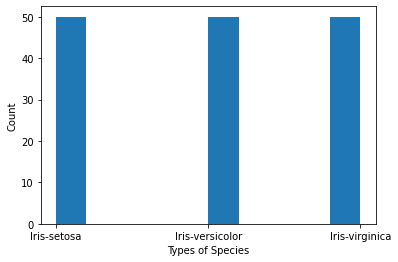

In [11]:
#plot histogram for each unique Species
plt.hist(data_df['Species'])
plt.xlabel('Types of Species')
plt.ylabel('Count')
plt.show()

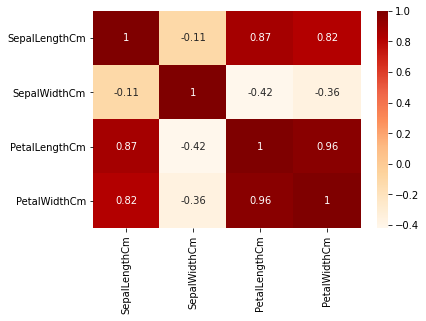

In [12]:
# heatmap
sns.heatmap(data_df.corr(),annot=True,cmap='OrRd')

**We can see that Petal length and Petal width are highly positive correlated to each other, so we can drop the column but we have only few columns so we are not dropping it**

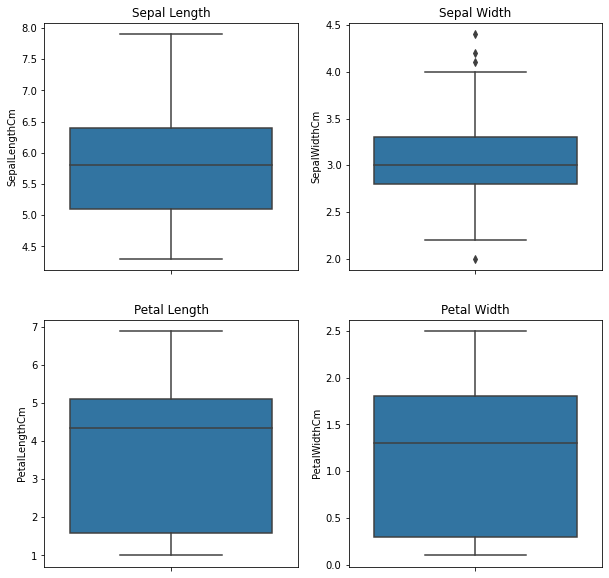

In [13]:
#box plot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bp=sns.boxplot(y=data_df.SepalLengthCm,ax=ax[0, 0])
ax[0, 0].set_title('Sepal Length')
bp=sns.boxplot(y=data_df.SepalWidthCm,ax=ax[0, 1])
ax[0, 1].set_title('Sepal Width')
bp=sns.boxplot(y=data_df.PetalLengthCm,ax=ax[1, 0])
ax[1,0].set_title('Petal Length')
bp=sns.boxplot(y=data_df.PetalWidthCm,ax=ax[1, 1])
ax[1,1].set_title('Petal Width')
plt.show()

**We can see from the boxplot that we have outliers in sepal width column but we are not dropping it because we have a small dataset**

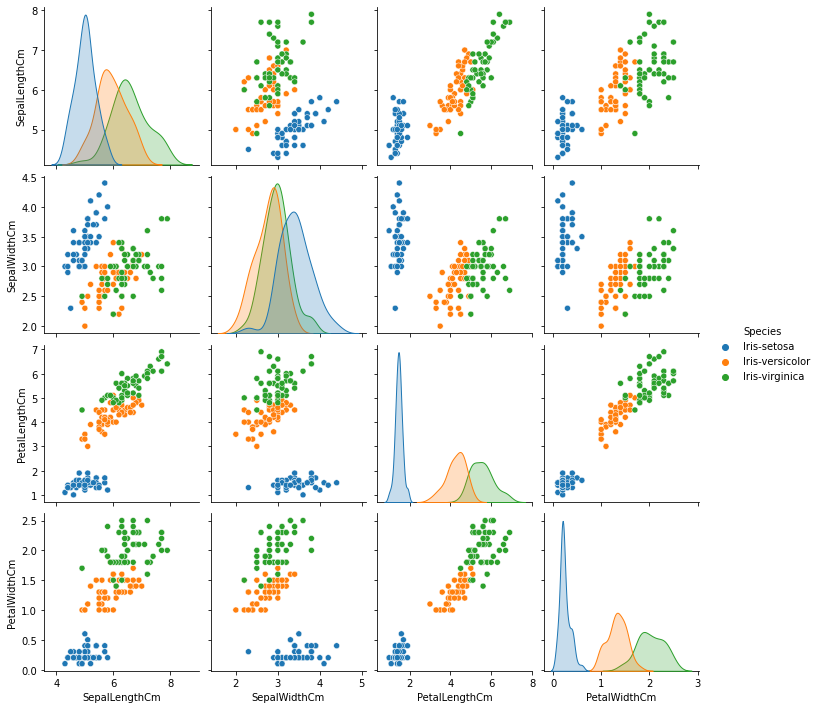

In [14]:
# pairplot
sns.pairplot(data_df,hue='Species')

In [15]:
#finding number of clusters
df = data_df.iloc[:, [0, 1, 2, 3]].values

wcss=[]
K=range(1,11)
for i in K:
    kmean=KMeans(n_clusters=i, init ='k-means++', max_iter =400, n_init =10, random_state = 121)
    kmean.fit(df)
    wcss.append(kmean.inertia_)

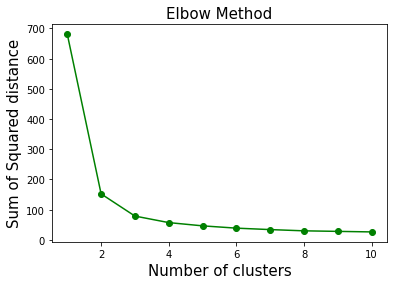

In [16]:
# elbow method
plt.plot(range(1,11),wcss,marker='o',color='green')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

**From the above plot it is very much clear that the optimum number of clusters for clustering is 3**

In [17]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=400,n_init=10,random_state=121)
y_kmeans=kmeans.fit_predict(df)

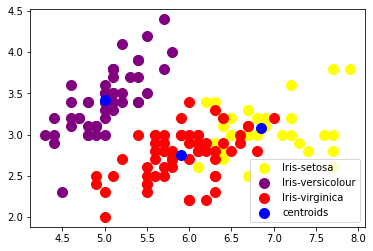

In [18]:
# Visualising the clusters on the first 2 columns
plt.scatter(df[y_kmeans == 0, 0],df[y_kmeans == 0, 1],s = 100,c = 'yellow',label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0],df[y_kmeans == 1, 1],s = 100,c = 'purple',label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0],df[y_kmeans == 2, 1],s = 100,c = 'red',label = 'Iris-virginica')

# Plot centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], 
            s = 100,c = 'blue',label = 'centroids')
plt.legend()

In [19]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
metrics.silhouette_score(df, kmeans.labels_)

0.5525919445499757